In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sc

In [2]:
df=pd.read_csv("framingham.csv")

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Data Filtering

In [7]:
## find the missing value
df.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
##count of missing value
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
##give the percentage of missing value
df.isnull().sum()/len(df)*100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [10]:
## handle missing value
df['glucose']=df['glucose'].fillna(df['glucose'].mean())
df=df.dropna()

In [11]:
## check the dublicate data
df.duplicated().sum()

0

In [12]:
df['diabetes'].value_counts()

diabetes
0    3888
1     101
Name: count, dtype: int64

In [13]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: xlabel='TenYearCHD'>

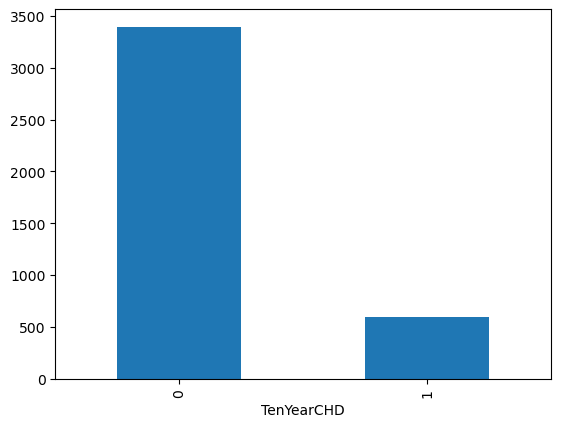

In [14]:
df["TenYearCHD"].value_counts().plot(kind='bar')

<Axes: xlabel='male'>

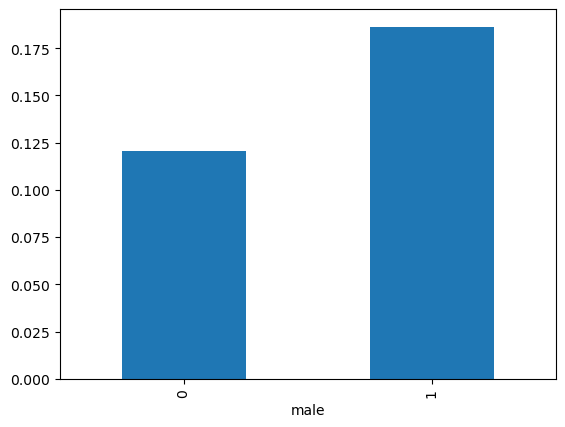

In [15]:
df.groupby('male')['TenYearCHD'].mean().plot(kind='bar')

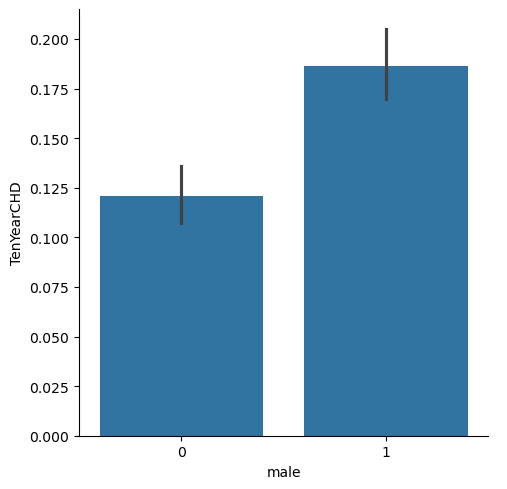

In [16]:
sns.catplot(df,x="male",y="TenYearCHD",kind='bar')

In [17]:
df_col=df.nunique().reset_index()
df_col

,index,0
0,male,2
1,age,39
2,education,4
3,currentSmoker,2
4,cigsPerDay,33
5,BPMeds,2
6,prevalentStroke,2
7,prevalentHyp,2
8,diabetes,2
9,totChol,244


In [18]:
df_col.columns=['feature','categories']
df_col = df_col[df_col['categories'] < 10]

In [19]:
df_cat = df[df_col['feature'].values]
df_cat


,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4.0,0,0.0,0,0,0,0
1,0,2.0,0,0.0,0,0,0,0
2,1,1.0,1,0.0,0,0,0,0
3,0,3.0,1,0.0,0,1,0,1
4,0,3.0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
4234,1,3.0,1,0.0,0,0,0,0
4236,0,1.0,1,0.0,0,0,0,0
4237,0,2.0,0,0.0,0,0,0,0
4238,1,3.0,0,0.0,0,1,0,0


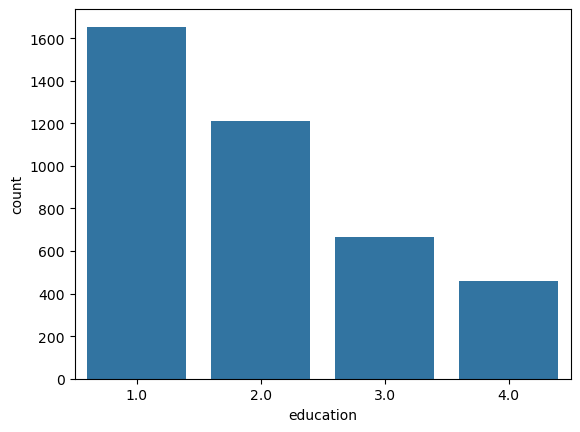

In [20]:
sns.countplot(data=df_cat,x='education')
plt.show()

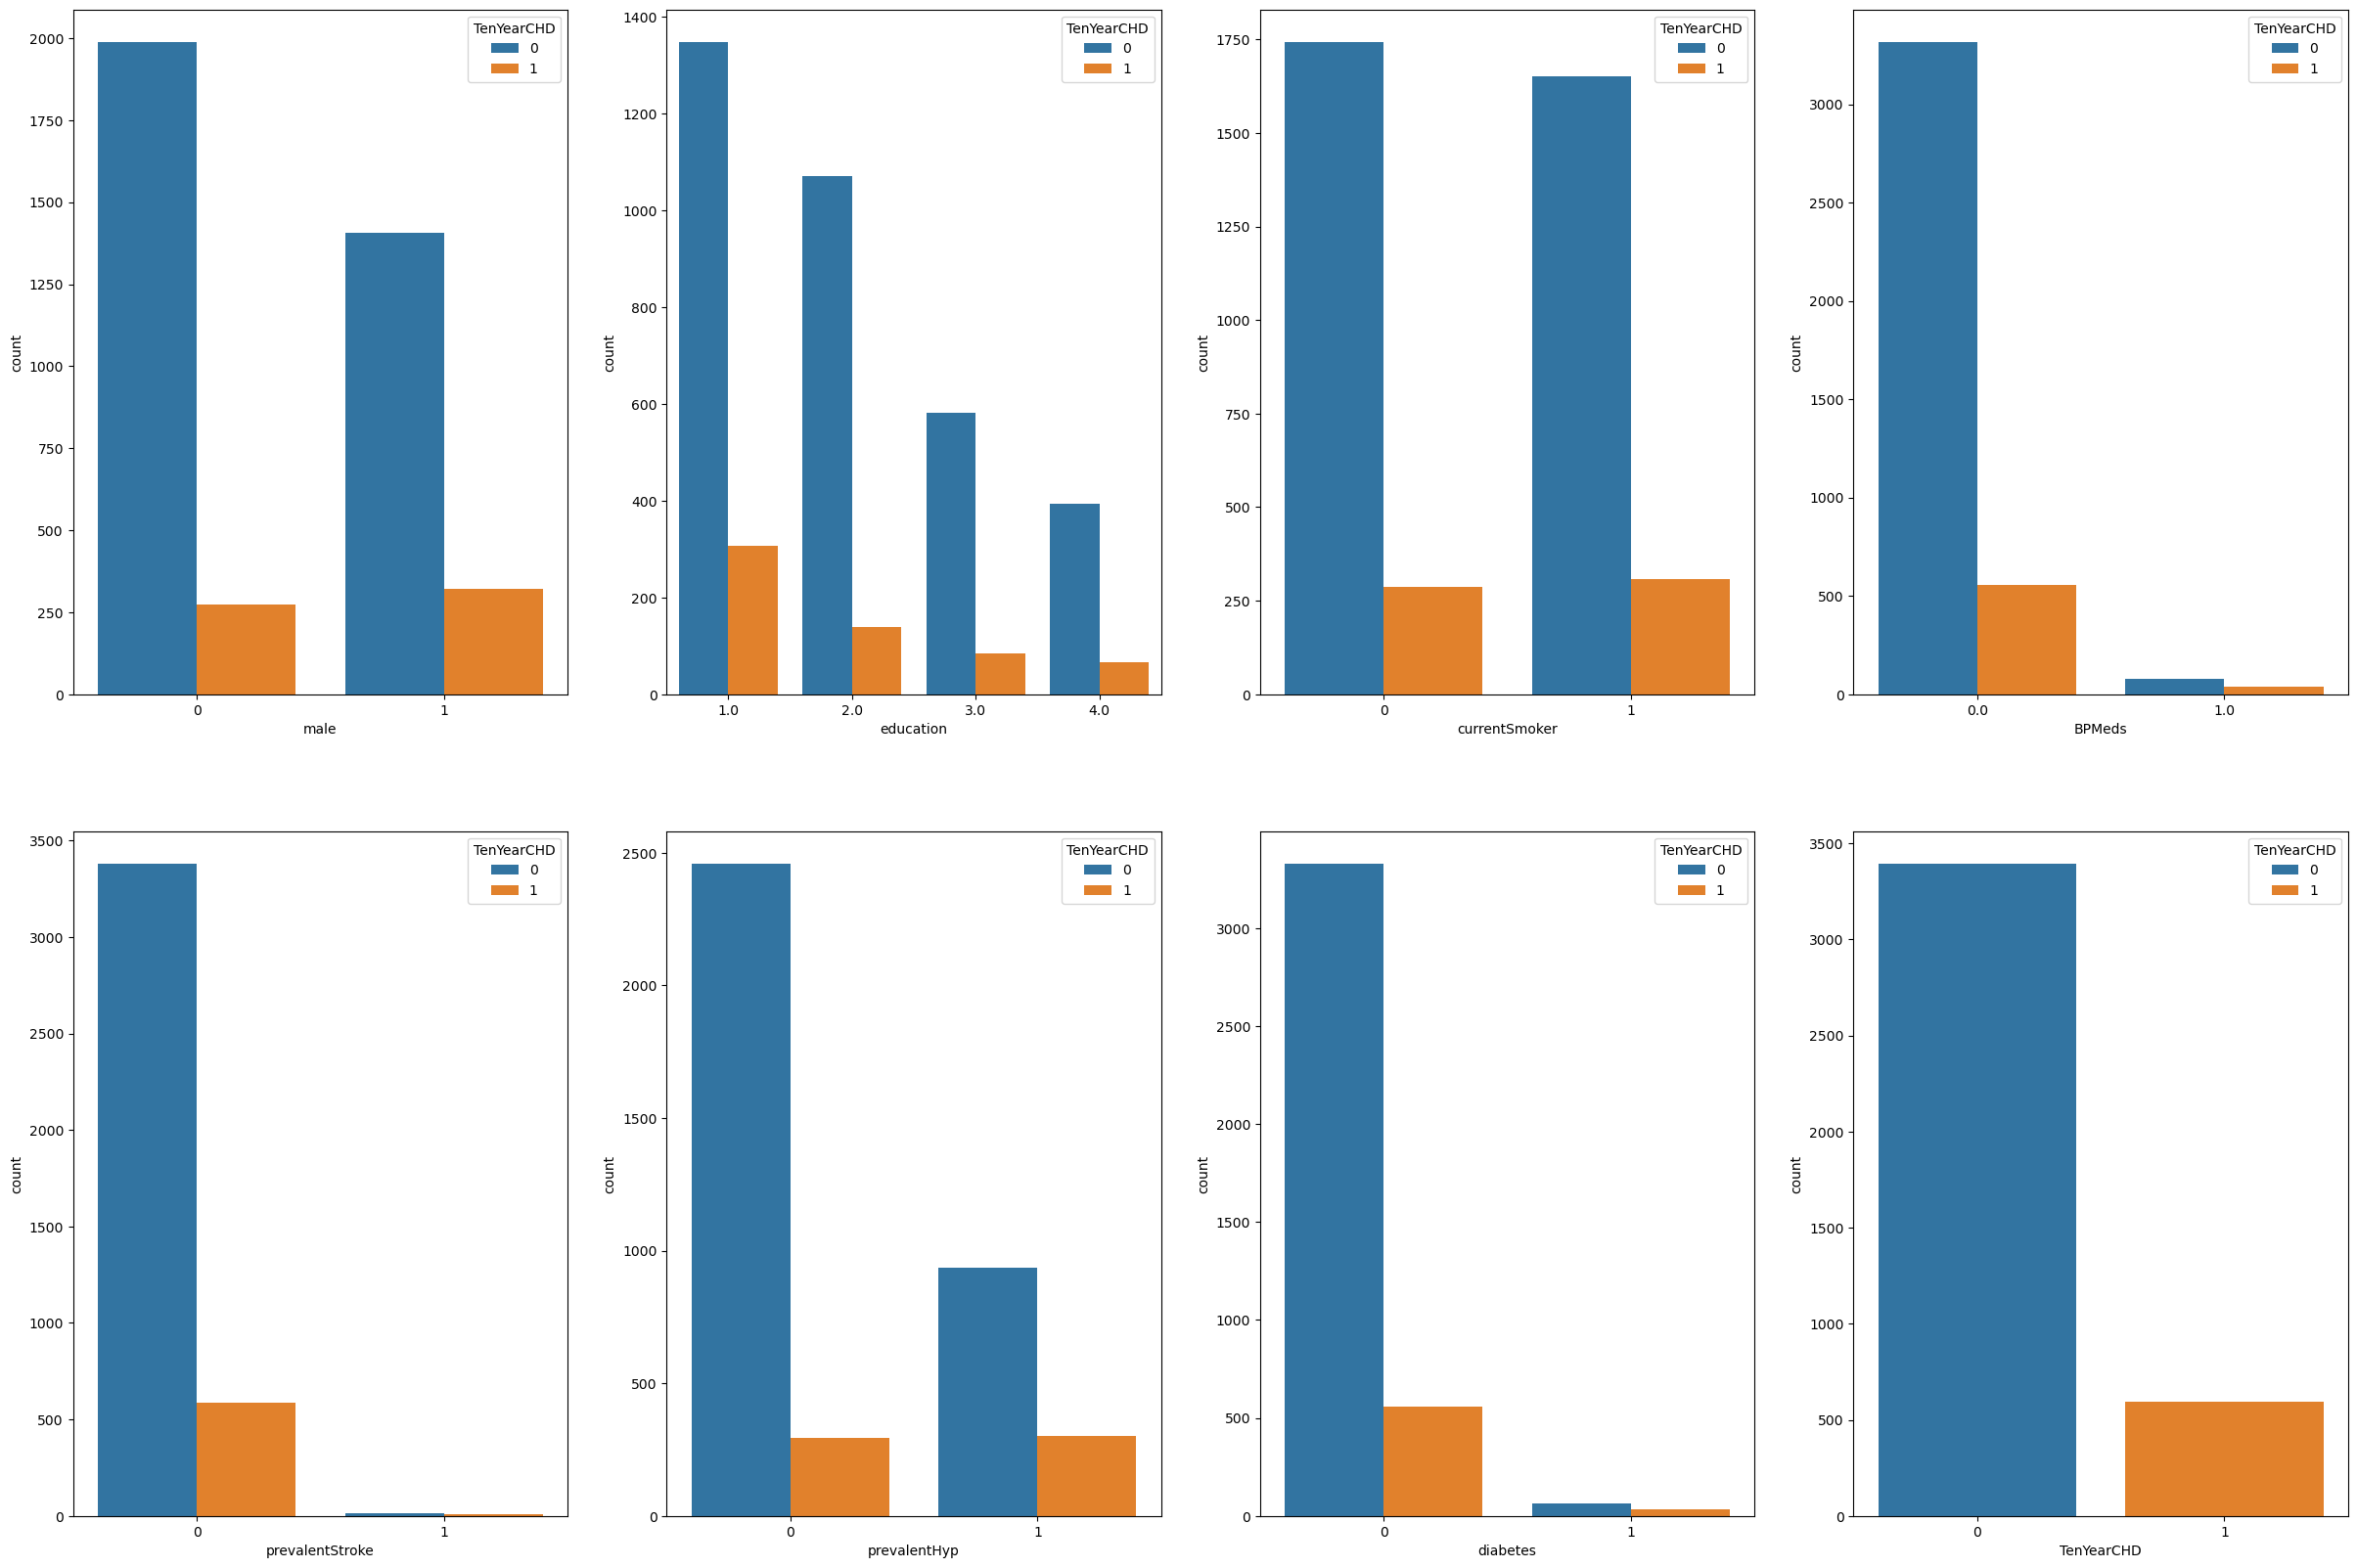

In [21]:
plt.figure(figsize=(30,20))
for i in enumerate(df_cat.columns):
    plt.subplot(2,4,i[0]+1)
    sns.countplot(data=df_cat,x=i[1],hue='TenYearCHD')


In [22]:
df_cont=df.drop(df_col['feature'],axis=1)
df_cont

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.000000
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.000000
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.000000
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.000000
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.000000
4236,44,15.0,210.0,126.5,87.0,19.16,86.0,81.963655
4237,52,0.0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,40,0.0,185.0,141.0,98.0,25.60,67.0,72.000000


<Axes: >

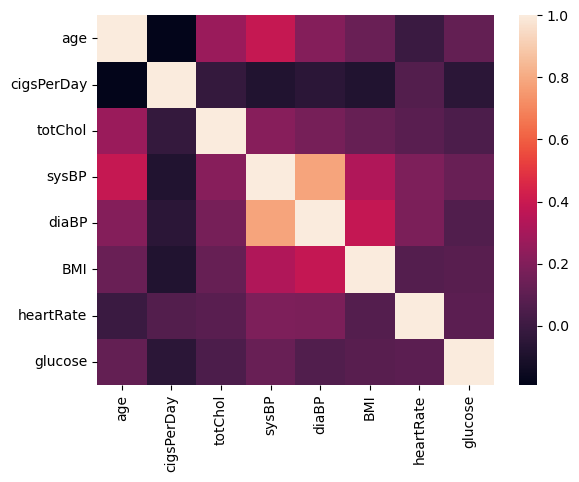

In [23]:
sns.heatmap(df_cont.corr())

<Axes: >

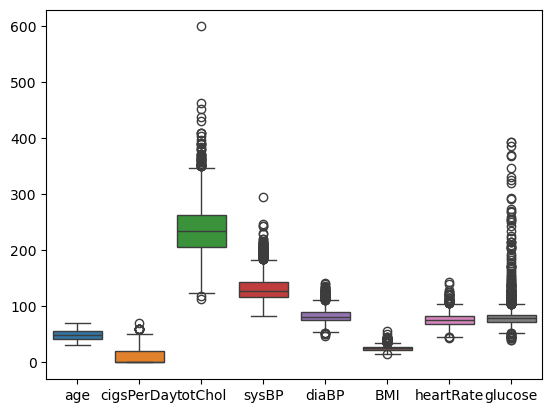

In [24]:
sns.boxplot(data=df_cont)

<Axes: xlabel='TenYearCHD'>

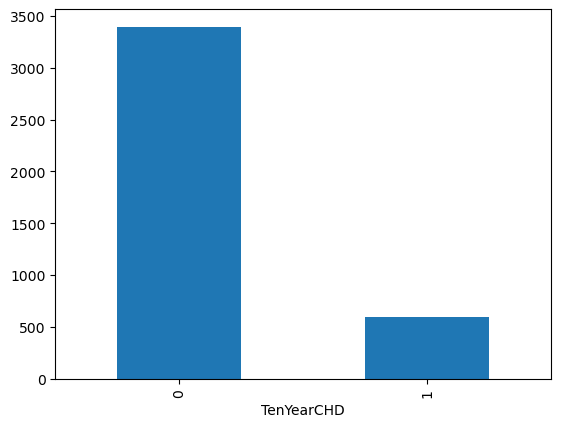

In [25]:
df['TenYearCHD'].value_counts().plot(kind='bar')

In [26]:
##spling of data 
X=df_cont
y=df['TenYearCHD']

In [27]:
##embalannce handling 
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=42)
X_os,y_os=os.fit_resample(X,y)


In [28]:
X_os.shape

(6788, 8)

In [29]:
y_os.shape

(6788,)

In [30]:
y_os.value_counts()

TenYearCHD
0    3394
1    3394
Name: count, dtype: int64

In [31]:
## actual train test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.2,random_state=42)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)

In [33]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_sc,y_train)

LinearRegression()

In [34]:
x_test_sc=scaler.fit_transform(X_test)


In [37]:
result=model.score(x_test_sc,y_test)
result*100


14.16754923982092

In [38]:
result=model.score(X_train_sc,y_train)
result*100


15.861335565898472